In [37]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
feature_extracting_cleaned = pd.read_csv('C:/Users/mayuo/OneDrive/Documents/Machine Learning by Abraham/interview_take_home/data/clusted_df.csv')
feature_extracting_cleaned.drop(columns= 'Unnamed: 0', inplace=True)
feature_extracting_cleaned.head(3)

,ps_cluster,market_segment,sub_type,ps_weekday_working_usage,ps_weekday_nonworking_usage,ps_weekend_usage,ps_doc_average_file_size,ps_doc_average_openseconds,generic_email,count_camera_make,...,traditional_art_score,commercial_design_score,design_complexity_score,social_media_score,total_visual_usage,total_design_illustration_usage,total_adobe_activity_score,video_media_creation_score,design_engagement_score,cluster_name
0,0,COMMERCIAL,Phtoshp Lightrm Bndl,0.621516,0.000000,0.378484,Small,Long,True,0.005525,...,0.005525,0.0,0.001842,0.016575,0.276243,0.027624,0.042357,0.0,0.0,occasional_taskers
1,0,COMMERCIAL,Phtoshp Lightrm Bndl,0.719328,0.014286,0.266387,Medium,Long,True,0.005525,...,0.000000,0.0,0.000000,0.000000,0.151934,0.151934,0.012891,0.0,0.0,occasional_taskers
2,0,COMMERCIAL,Phtoshp Lightrm Bndl,0.566488,0.244484,0.189028,Small,Short,True,0.011050,...,0.000000,0.0,0.000000,0.000000,0.831492,0.279006,0.029466,0.0,0.0,occasional_taskers


In [39]:
X = feature_extracting_cleaned.drop(columns=['ps_cluster', 'cluster_name'])  # drop target column
y = feature_extracting_cleaned['cluster_name']  # target variable

In [40]:
feature_extracting_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10276 entries, 0 to 10275
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ps_cluster                       10276 non-null  int64  
 1   market_segment                   10276 non-null  object 
 2   sub_type                         10276 non-null  object 
 3   ps_weekday_working_usage         10276 non-null  float64
 4   ps_weekday_nonworking_usage      10276 non-null  float64
 5   ps_weekend_usage                 10276 non-null  float64
 6   ps_doc_average_file_size         10276 non-null  object 
 7   ps_doc_average_openseconds       10276 non-null  object 
 8   generic_email                    10276 non-null  bool   
 9   count_camera_make                10276 non-null  float64
 10  count_camera_model               10276 non-null  float64
 11  total_video_usage                10276 non-null  float64
 12  total_3d_usage    

In [41]:
# Categorical columns to be one-hot encoded
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [42]:
# Numerical columns to be scaled
numerical_cols = X.select_dtypes(include=['float64']).columns.tolist()

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scaling numerical features
        ('cat', OneHotEncoder(), categorical_cols)   # One-hot encoding categorical features
    ])

# Build a pipeline with preprocessing and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [44]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ps_weekday_working_usage',
                                                   'ps_weekday_nonworking_usage',
                                                   'ps_weekend_usage',
                                                   'count_camera_make',
                                                   'count_camera_model',
                                                   'total_video_usage',
                                                   'total_3d_usage',
                                                   'num_used_products',
                                                   'camera_usage_ratio',
                                                   'digital_design_score',
                                                   'visual_media_score',
                                                   'traditional_art_score...
                                                   'video_media_creation_score',
                                                   'design_engagement_score']),
                                                 ('cat', OneHotEncoder(),
                                                  ['market_segment', 'sub_type',
                                                   'ps_doc_average_file_size',
                                                   'ps_doc_average_openseconds',
                                                   'machine_ps_max_numprocessors',
                                                   'operating_system',
                                                   'most_used_products',
                                                   'memory_category',
                                                   'machine_ps_speed_bin',
                                                   'usage_profile'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [45]:
# Predict on the test set
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

Training Classification Report:
                      precision    recall  f1-score   support

creative_powerhouses       1.00      1.00      1.00       707
engaged_all_rounders       1.00      1.00      1.00      1021
multimedia_explorers       1.00      1.00      1.00       355
  occasional_taskers       1.00      1.00      1.00      3429
   weekend_explorers       1.00      1.00      1.00      2708

            accuracy                           1.00      8220
           macro avg       1.00      1.00      1.00      8220
        weighted avg       1.00      1.00      1.00      8220

Training Confusion Matrix:


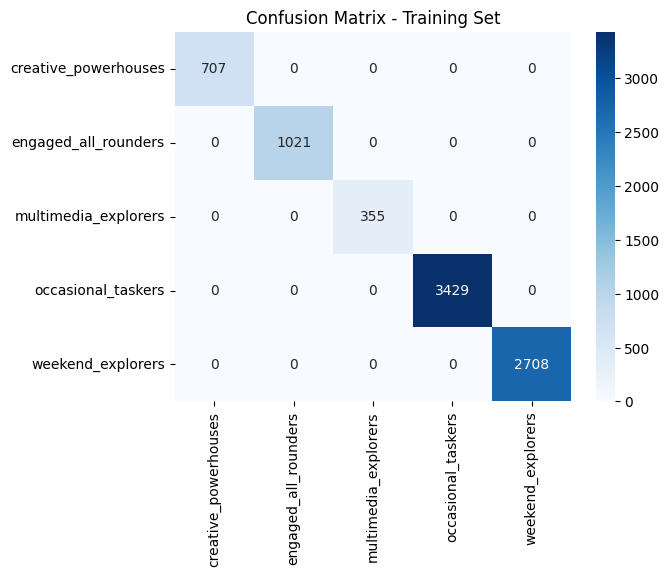

Testing Classification Report:
                      precision    recall  f1-score   support

creative_powerhouses       0.91      0.89      0.90       175
engaged_all_rounders       0.92      0.86      0.89       243
multimedia_explorers       0.96      0.79      0.87        90
  occasional_taskers       0.95      0.98      0.97       871
   weekend_explorers       0.97      0.97      0.97       677

            accuracy                           0.95      2056
           macro avg       0.94      0.90      0.92      2056
        weighted avg       0.95      0.95      0.95      2056

Testing Confusion Matrix:


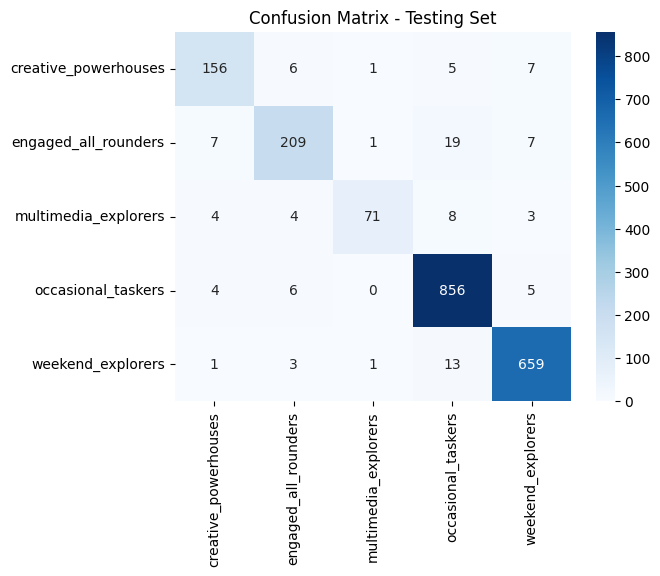

In [46]:
# Classification report and confusion matrix for training set
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Training Confusion Matrix:")
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix - Training Set')
plt.show()

# Classification report and confusion matrix for testing set
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Testing Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix - Testing Set')
plt.show()

In [47]:
y.value_counts()

cluster_name
occasional_taskers      4300
weekend_explorers       3385
engaged_all_rounders    1264
creative_powerhouses     882
multimedia_explorers     445
Name: count, dtype: int64

In [48]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Encoding the target variable (y) labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define classifiers to try
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(learning_rate=0.05)
}

# Preprocessor for scaling numerical and encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scaling numerical features
        ('cat', OneHotEncoder(), categorical_cols)   # One-hot encoding categorical features
    ])

# Loop through the classifiers, apply the pipeline and print the classification reports
for name, classifier in classifiers.items():
    print(f"\n{'='*50}\n{name} Classifier")
    
    # Build pipeline with preprocessing and classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit the model on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict on train and test data
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Print classification reports
    print(f"Training Classification Report for {name}:\n")
    print(classification_report(y_train, y_train_pred, target_names=label_encoder.classes_))
    
    print(f"Testing Classification Report for {name}:\n")
    print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

    print(f"{'='*50}")



Random Forest Classifier
Training Classification Report for Random Forest:

                      precision    recall  f1-score   support

creative_powerhouses       1.00      1.00      1.00       707
engaged_all_rounders       1.00      1.00      1.00      1021
multimedia_explorers       1.00      1.00      1.00       355
  occasional_taskers       1.00      1.00      1.00      3429
   weekend_explorers       1.00      1.00      1.00      2708

            accuracy                           1.00      8220
           macro avg       1.00      1.00      1.00      8220
        weighted avg       1.00      1.00      1.00      8220

Testing Classification Report for Random Forest:

                      precision    recall  f1-score   support

creative_powerhouses       0.91      0.89      0.90       175
engaged_all_rounders       0.92      0.86      0.89       243
multimedia_explorers       0.96      0.79      0.87        90
  occasional_taskers       0.95      0.98      0.97       871
 